In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv(r'C:\Users\KIIT\Desktop\ML Tutedue\Dataset\Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [10]:
df.drop(columns=["Order_ID"],inplace=True)
df.columns

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

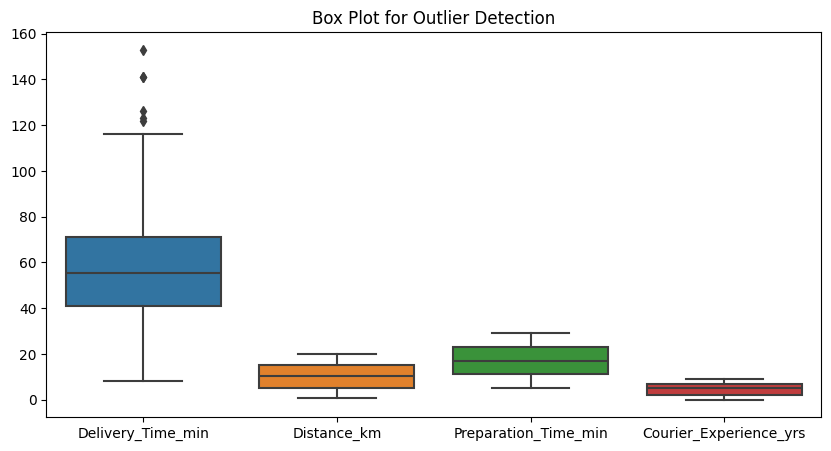

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Delivery_Time_min','Distance_km','Preparation_Time_min','Courier_Experience_yrs']])
plt.title("Box Plot for Outlier Detection")
plt.show()


In [12]:
def remove_outlier(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [13]:
for col in ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']:
    df = remove_outlier(df, col)

In [14]:
df.columns

Index(['Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

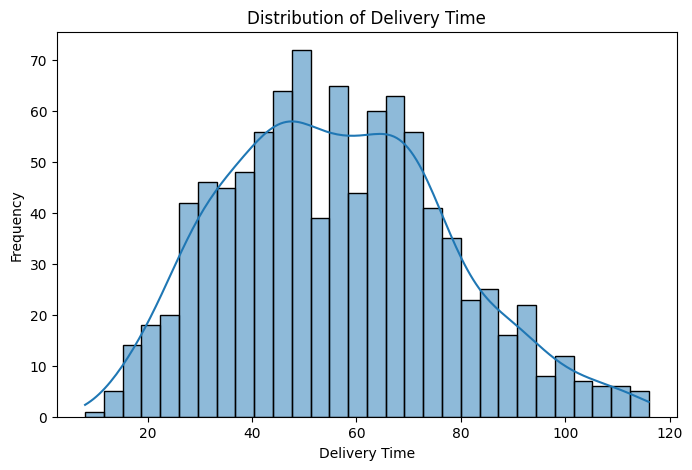

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["Delivery_Time_min"],kde=True,bins=30)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time")
plt.ylabel("Frequency")
plt.show()





In [16]:
skewness = df["Delivery_Time_min"].skew()
print(f"Skewness of Delivery: {skewness}")

Skewness of Delivery: 0.3232113216649741


In [17]:
df.isna().sum()

Distance_km                0
Weather                   29
Traffic_Level             29
Time_of_Day               28
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs     0
Delivery_Time_min          0
dtype: int64

In [18]:
# df.fillna(method='ffill')
# df.fillna(method='bfill')
# df['weather'].fillna(df['weather'].mode()[0])

In [19]:
numerical_imputer=SimpleImputer(strategy='median')
df[['Courier_Experience_yrs']]=numerical_imputer.fit_transform(df[['Courier_Experience_yrs']])

In [20]:
catergorical_imputer=SimpleImputer(strategy='most_frequent')
df[['Weather','Traffic_Level','Time_of_Day']]=catergorical_imputer.fit_transform(df[['Weather','Traffic_Level','Time_of_Day']])

In [21]:
df.isna().sum()

Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [22]:
df=pd.get_dummies(df,columns=['Vehicle_Type'],drop_first=True)

In [23]:
label_encoder=LabelEncoder()
for col in ['Weather', 'Traffic_Level', 'Time_of_Day']:
    df[col]= label_encoder.fit_transform(df[col])

In [24]:
X = df.drop(columns=["Delivery_Time_min"])
y = df["Delivery_Time_min"]

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [26]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_predict=model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict) *100
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Squared Error: 98.34309900166566
Root Mean Squared Error: 9.916808912229058
R² Score: 73.3967328577007


In [29]:
new_data = {
    'Courier_Experience_yrs': [3],   
    'Distance_km': [5.2],            
    'Preparation_Time_min': [15],    
    'Weather': ['Clear'],            
    'Traffic_Level': ['Medium'],     
    'Time_of_Day': ['Evening'],      
    'Vehicle_Type_Scooter': [1],     
    'Vehicle_Type_Car': [0]        
}

new_df = pd.DataFrame(new_data)

weather_mapping = {'Clear': 0, 'Rainy': 1, 'Foggy': 2,'Snowy': 3,'Windy': 4}
traffic_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
time_of_day_mapping = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}

new_df['Weather'] = new_df['Weather'].map(weather_mapping)
new_df['Traffic_Level'] = new_df['Traffic_Level'].map(traffic_mapping)
new_df['Time_of_Day'] = new_df['Time_of_Day'].map(time_of_day_mapping)

new_df = new_df[X_train.columns]

predicted_time = model.predict(new_df)
print(f"Predicted Delivery Time: {predicted_time[0]:.2f} minutes")


Predicted Delivery Time: 39.86 minutes


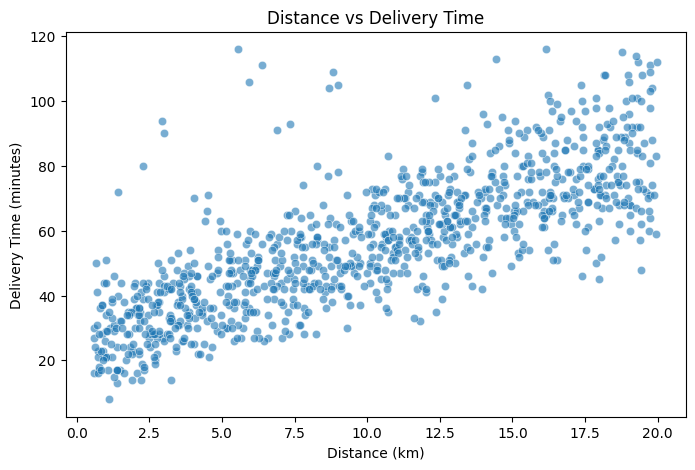

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Distance_km'], y=df['Delivery_Time_min'], alpha=0.6)
plt.title("Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()


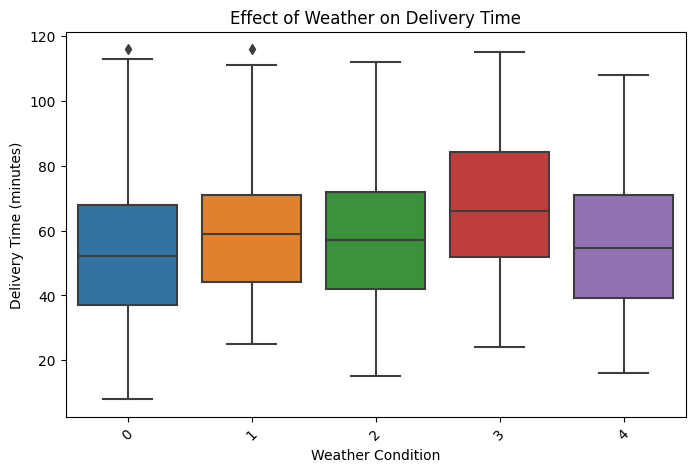

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Weather'], y=df['Delivery_Time_min'])
plt.title("Effect of Weather on Delivery Time")
plt.xlabel("Weather Condition")
plt.ylabel("Delivery Time (minutes)")
plt.xticks(rotation=45)
plt.show()


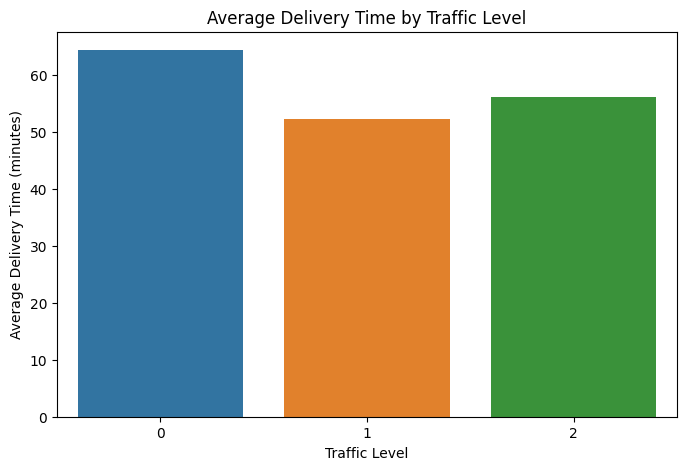

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Traffic_Level'], y=df['Delivery_Time_min'], estimator=np.mean, ci=None)
plt.title("Average Delivery Time by Traffic Level")
plt.xlabel("Traffic Level")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()
